In [1]:
from pathlib import Path
from typing import Union

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
# should enable plotting without explicit call .show()

# Grid search analysis

In [4]:
def load_grid_search_data(data_dir="Outputs/exp2.txt", norm_used=False) -> pd.DataFrame:
    """
    """
    
    data_path = Path.cwd() / data_dir
    
    data = []
    with open(data_path, 'r') as file:
        for line in file:
            # Remove the unwanted characters
            line = line\
                .replace('f-', '')\
                .replace('d-', '')\
                .replace('n-' if norm_used else '', '')\
                .replace(':', '')\
                .split()

            # Convert the values to the appropriate data types
            f_value = float(line[0])
            d_value = float(line[1])
            n_value = float(line[2]) if norm_used else None
            food_amount = int(line[3]) if norm_used else int(line[2])

            # Add the data to a list
            data.append([f_value, d_value, n_value, food_amount]) if norm_used\
                else data.append([f_value, d_value, food_amount])

    # Load the data into a pandas DataFrame
    df = pd.DataFrame(data, 
                columns=['fade_rate', 'difusion_rate', 'normalization_parameter', 'num_food']
            ) if norm_used\
            else pd.DataFrame(data,
                columns=['fade_rate', 'difusion_rate', 'num_food']
            )

    return df

In [5]:
grid_search_1_data = load_grid_search_data(data_dir="Outputs/exp1.txt", norm_used=True)

In [6]:
grid_search_1_data

,fade_rate,difusion_rate,normalization_parameter,num_food
0,0.0001,0.0,0.0000,282
1,0.0001,0.0,0.0005,254
2,0.0001,0.0,0.0010,254
3,0.0001,0.1,0.0000,265
4,0.0001,0.1,0.0005,271
...,...,...,...,...
325,0.0010,0.9,0.0005,47
326,0.0010,0.9,0.0010,35
327,0.0010,1.0,0.0000,8
328,0.0010,1.0,0.0005,22


## First Variant (with normalization parameter)

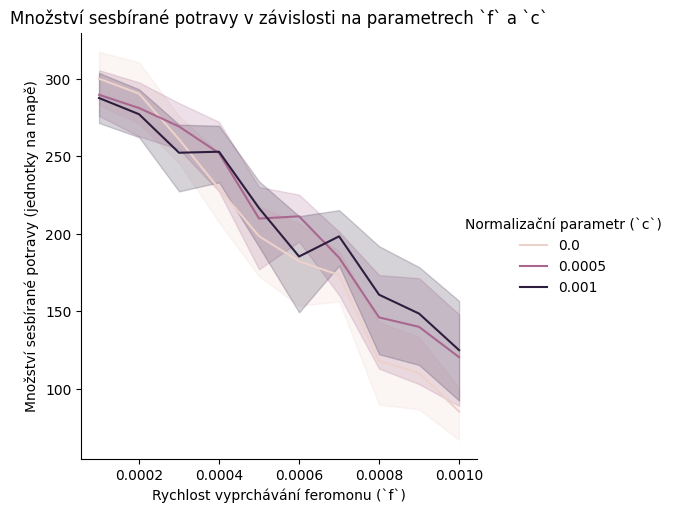

In [7]:
g = sns.relplot(
    data=grid_search_1_data, 
    x="fade_rate",
    y="num_food", 
    hue="normalization_parameter",
    # hue="difusion_rate",
    aspect=1,
    kind="line",
).set(title="Množství sesbírané potravy v závislosti na parametrech `f` a `c`")

g.set_xlabels("Rychlost vyprchávání feromonu (`f`)")
g.set_ylabels("Množství sesbírané potravy (jednotky na mapě)")

g._legend.set_title("Normalizační parametr (`c`)")

# plt.savefig('template1/images/grid_search_1_fade.pdf', bbox_inches='tight')

In [8]:
# sns.relplot(
#     data=grid_search_1_data, 
#     x="fade_rate",
#     y="num_food", 
#     hue="normalization_parameter",
#     # hue="difusion_rate",
#     aspect=2,
#     kind="line",
#     col="difusion_rate",
#     col_wrap=2,
# )

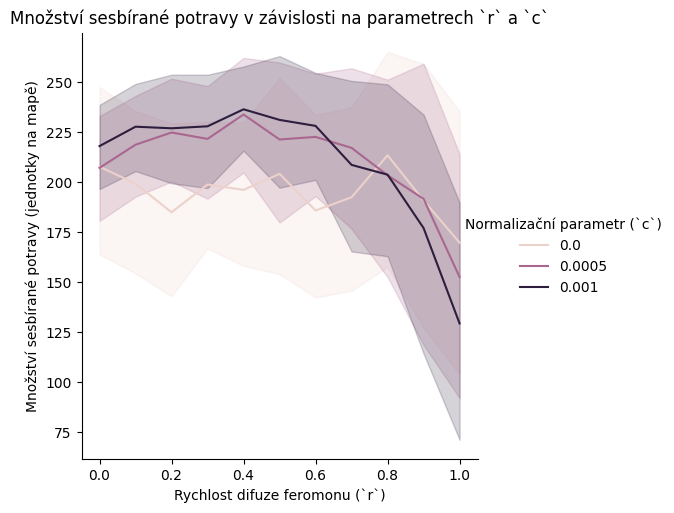

In [9]:
g = sns.relplot(
    data=grid_search_1_data, 
    x="difusion_rate",
    y="num_food", 
    hue="normalization_parameter",
    aspect=1,
    kind="line",
).set(title="Množství sesbírané potravy v závislosti na parametrech `r` a `c`")

g.set_xlabels("Rychlost difuze feromonu (`r`)")
g.set_ylabels("Množství sesbírané potravy (jednotky na mapě)")

g._legend.set_title("Normalizační parametr (`c`)")

# plt.savefig('template1/images/grid_search_1_difusion.pdf', bbox_inches='tight')

## Second Variant

In [10]:
grid_search_2_data = load_grid_search_data()

In [11]:
grid_search_2_data

,fade_rate,difusion_rate,num_food
0,0.0001,0.0,428
1,0.0001,0.1,392
2,0.0001,0.2,399
3,0.0001,0.3,400
4,0.0001,0.4,405
...,...,...,...
105,0.0010,0.6,126
106,0.0010,0.7,132
107,0.0010,0.8,114
108,0.0010,0.9,13


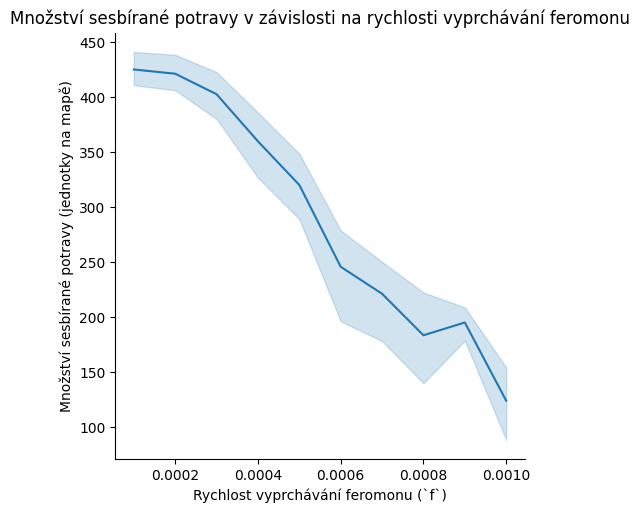

In [12]:
g = sns.relplot(
    data=grid_search_2_data, 
    x="fade_rate",
    y="num_food", 
    # hue="difusion_rate",
    # aspect=2,
    kind="line",
).set(title="Množství sesbírané potravy v závislosti na rychlosti vyprchávání feromonu")

g.set_xlabels("Rychlost vyprchávání feromonu (`f`)")
g.set_ylabels("Množství sesbírané potravy (jednotky na mapě)")

# plt.savefig('template1/images/grid_search_2_fade.pdf', bbox_inches='tight')

In [13]:
# sns.relplot(
#     data=grid_search_2_data, 
#     x="fade_rate",
#     y="num_food", 
#     hue="difusion_rate",
#     # aspect=2,
#     kind="line",
# )

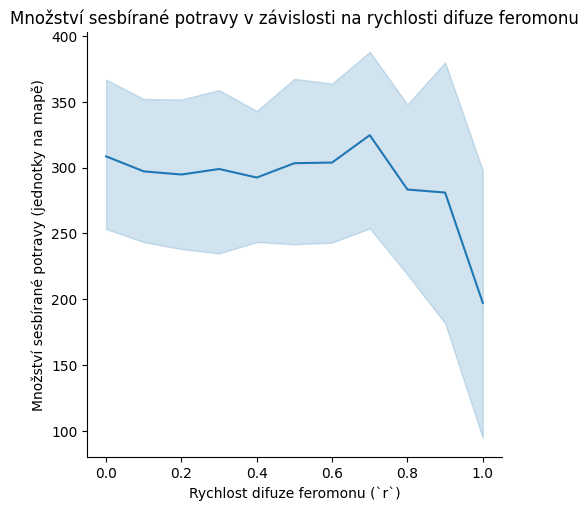

In [14]:
g = sns.relplot(
    data=grid_search_2_data, 
    x="difusion_rate",
    y="num_food", 
    kind="line",
).set(title="Množství sesbírané potravy v závislosti na rychlosti difuze feromonu")

g.set_xlabels("Rychlost difuze feromonu (`r`)")
g.set_ylabels("Množství sesbírané potravy (jednotky na mapě)")

# plt.savefig('template1/images/grid_search_2_difusion.pdf', bbox_inches='tight')

# Experiment results

Schema tabulky
```
    experiment_id num_food num_ants/search_depth food_encountered
```

In [15]:
def parse_experiment_data(data_path: Union[str, Path]) -> pd.DataFrame:
    """
    """
    
    map_variant = data_path.stem.split("_")[1]
    task_type = data_path.stem.split("_")[2]
    
    total_food = 0
    data = None
    
    with open(data_path, "r") as f:    
        # Skip the header
        for i in range(7):
            # Extract total amount of food.
            if i == 2:
                total_food = int(next(f).split(":")[-1])
                continue
            next(f)

        # read the data into a pandas DataFrame
        df = pd.read_csv(f, sep=" ", names=["variable_size", "num_food"])
    
    # Add participant ID to data.
    orig_cols = df.columns.to_list()
    new_cols = {
        "map_variant": map_variant,
        "task_type": task_type,
        "total_food": total_food,
    }
    df = df.assign(**new_cols)
    # print(new_cols.keys())
    df = df[list(new_cols.keys()) + orig_cols]
    
    df['food_percentage'] = df['num_food'] / df['total_food']
    
    
    return df

In [16]:
def load_experiment_data(
        data_dir="Prepared_Output/",
    ):
    
    """
    Load the data from all the experiments and store them into table.
    """
    
    selected_files = (Path.cwd() / data_dir).glob("*.txt")

    # for f in selected_files:
        # num, data = parse_data(f)
        # data.head()
    # parse_data(selected_files[0])
    # (parse_data(f) for f in selected_files)
    return pd.concat((parse_experiment_data(f) for f in selected_files)).sort_values(by=['map_variant'])

## All Data Overview

In [17]:
experiment_data = load_experiment_data()

In [18]:
# Rename the map variants:
map_variants = {
    "0": "var-0",
    "1": "var-1",
    "2": "var-2",
    "3": "var-3",
    "4": "var-4",
    "5": "var-5",
}

# Filter data for the specified trials and remove blinks.
experiment_data = experiment_data[experiment_data.map_variant.isin(map_variants.keys())]

# Create labels for the plots.
experiment_data["map_variant"] = experiment_data["map_variant"].map(map_variants).astype(str)

In [19]:
experiment_data

,map_variant,task_type,total_food,variable_size,num_food,food_percentage
50,var-0,depth,531,50,529,0.996234
90,var-0,ants,531,920,531,1.000000
89,var-0,ants,531,910,531,1.000000
88,var-0,ants,531,900,531,1.000000
87,var-0,ants,531,890,530,0.998117
...,...,...,...,...,...,...
161,var-5,ants,220,1630,171,0.777273
160,var-5,ants,220,1620,173,0.786364
159,var-5,ants,220,1610,172,0.781818
172,var-5,ants,220,1740,171,0.777273


In [35]:
# # Asi nechci, protoze je to dost biased kvuli 2 variantam experimetu.
# sns.catplot(
#     data=experiment_data,
#     y="map_variant",
#     x="food_percentage",
#     # kind="box",
#     kind="boxen",
#     # kind="violin",
#     )

In [21]:
# sns.relplot(
#     data=experiment_data, 
#     x="variable_size", 
#     y="food_percentage",
#     aspect=2,
#     kind="line",
#     hue="map_variant",
#     col="map_variant",
#     col_wrap=2,
# )

## Different Number of Ants

In [22]:
ants_data = experiment_data[experiment_data.task_type == "ants"]

In [23]:
# sns.relplot(
#     data=ants_data, 
#     x="variable_size", 
#     y="food_percentage", 
#     hue="map_variant",
# )

In [24]:
# sns.relplot(
#     data=ants_data[ants_data.variable_size < 500], 
#     x="variable_size", 
#     y="food_percentage", 
#     hue="map_variant",
#     kind="line",
#     aspect=2,
# )

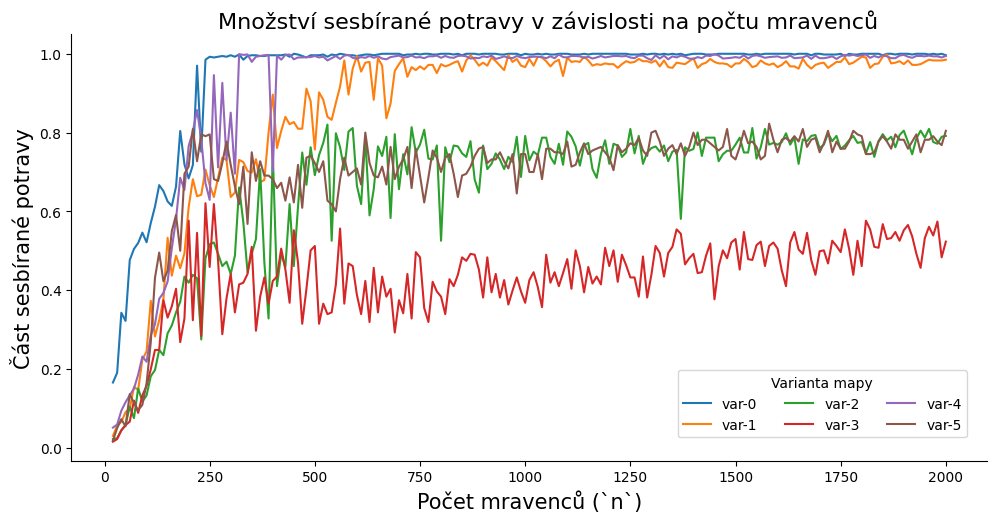

In [25]:
# sns.set(font_scale=1.005)

g = sns.relplot(
    data=ants_data, 
    x="variable_size", 
    y="food_percentage", 
    hue="map_variant",
    kind="line",
    aspect=2,
)

g.fig.suptitle("Množství sesbírané potravy v závislosti na počtu mravenců", fontsize=16, y=1.02)
g.set_xlabels("Počet mravenců (`n`)", fontsize=15) 
g.set_ylabels("Část sesbírané potravy", fontsize=15)  
g._legend.set_title("Varianta mapy")
# sns.move_legend(g, "lower right")

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.75, .15), ncol=3, title='Varianta mapy', frameon=True,
)


# plt.legend(loc='lower right', title='Varianta mapy')

# plt.savefig('template1/images/num_ants_variants_together.pdf', bbox_inches='tight')

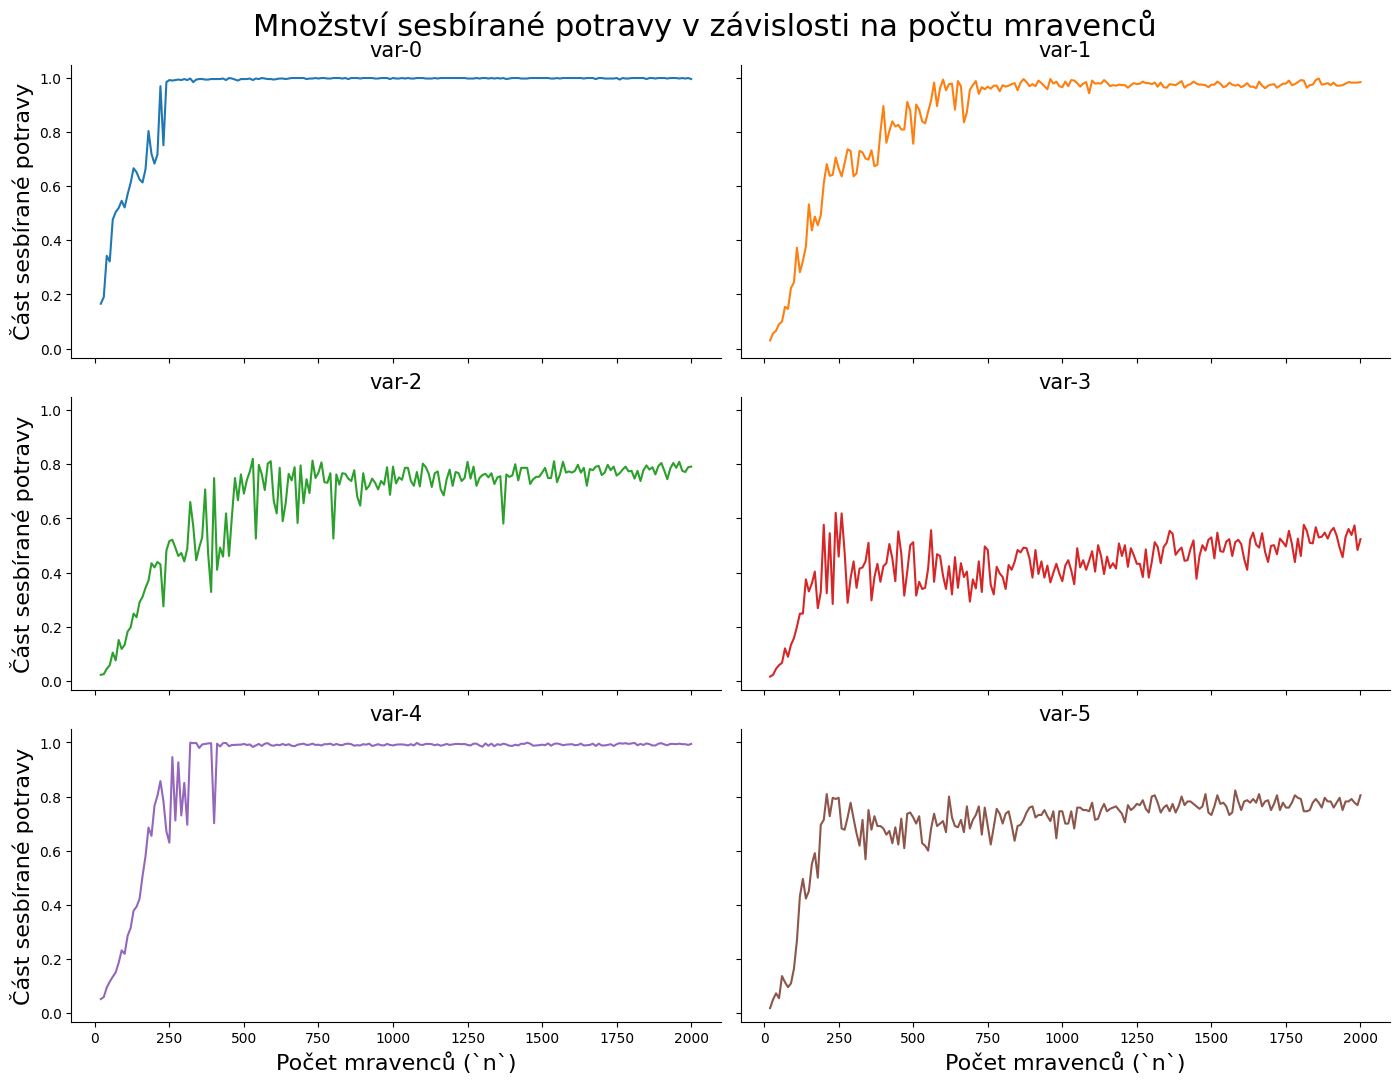

In [26]:
g = sns.relplot(
    data=ants_data, 
    x="variable_size", 
    y="food_percentage",
    aspect=2,
    height=3.5,
    kind="line",
    hue="map_variant",
    col="map_variant",
    col_wrap=2,
    legend=False,
)

g.set_xlabels("Počet mravenců (`n`)", fontsize=16) 
g.set_ylabels("Část sesbírané potravy", fontsize=16)

# Change the supertitle
g.fig.suptitle("Množství sesbírané potravy v závislosti na počtu mravenců", fontsize=22, y=1.02)

# Set each title of the subplots to map_variant value
for ax, title in zip(g.axes.flat, ants_data["map_variant"].unique()):
    ax.set_title(title, fontsize=15)

# plt.savefig('template1/images/num_ants_variants_separated.pdf', bbox_inches='tight')

In [36]:
# sns.relplot(
#     data=ants_data[ants_data.variable_size < 500], 
#     x="variable_size", 
#     y="food_percentage", 
#     hue="map_variant",
#     aspect=2,
#     kind="line",
# )

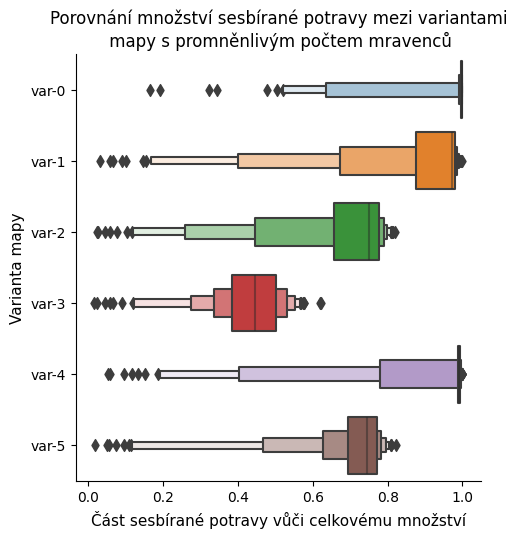

In [41]:
g = sns.catplot(
    data=ants_data,
    y="map_variant",
    x="food_percentage",
    kind="boxen",
).set(title="Porovnání množství sesbírané potravy mezi variantami\n mapy s promněnlivým počtem mravenců")


g.set_axis_labels("Část sesbírané potravy vůči celkovému množství", "Varianta mapy", fontsize=11)

# plt.savefig('template1/images/num_ants_variants_means.pdf', bbox_inches='tight')

## Different Search Depth

In [29]:
depth_data = experiment_data[experiment_data.task_type == "depth"]

In [42]:
# sns.relplot(
#     data=depth_data, 
#     x="variable_size", 
#     y="food_percentage", 
#     hue="map_variant",
# )

In [43]:
# sns.relplot(
#     data=depth_data, 
#     x="variable_size", 
#     y="food_percentage", 
#     hue="map_variant",
# )

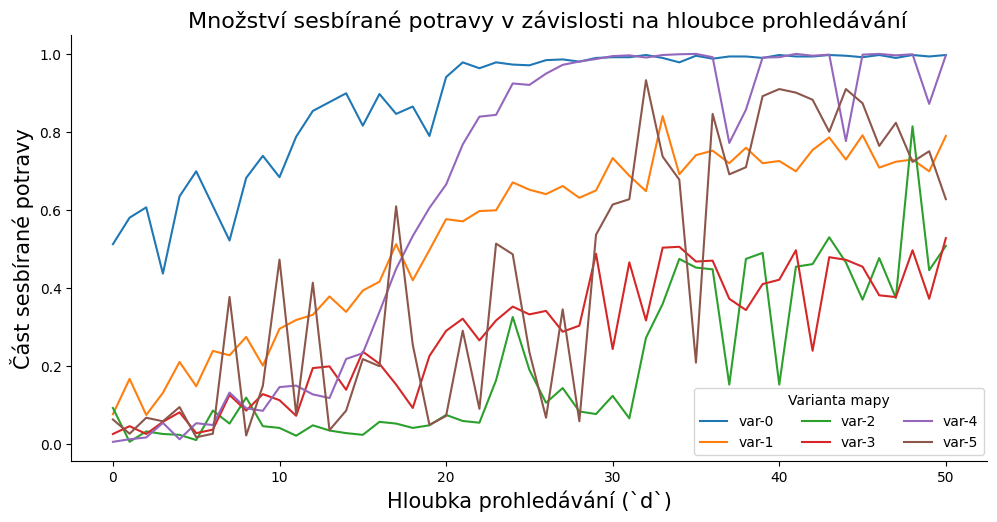

In [32]:
g = sns.relplot(
    data=depth_data, 
    x="variable_size", 
    y="food_percentage", 
    hue="map_variant",
    kind="line",
    aspect=2
)#.set(title="Množství sesbírané potravy v závislosti na hloubce prohledávání")

g.fig.suptitle("Množství sesbírané potravy v závislosti na hloubce prohledávání", fontsize=16, y=1.02)
g.set_xlabels("Hloubka prohledávání (`d`)", fontsize=15) 
g.set_ylabels("Část sesbírané potravy", fontsize=15)
g._legend.set_title("Varianta mapy")

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.765, .115), ncol=3, title='Varianta mapy', frameon=True,
)


# plt.savefig('template1/images/search_depth_variants_together.pdf', bbox_inches='tight')

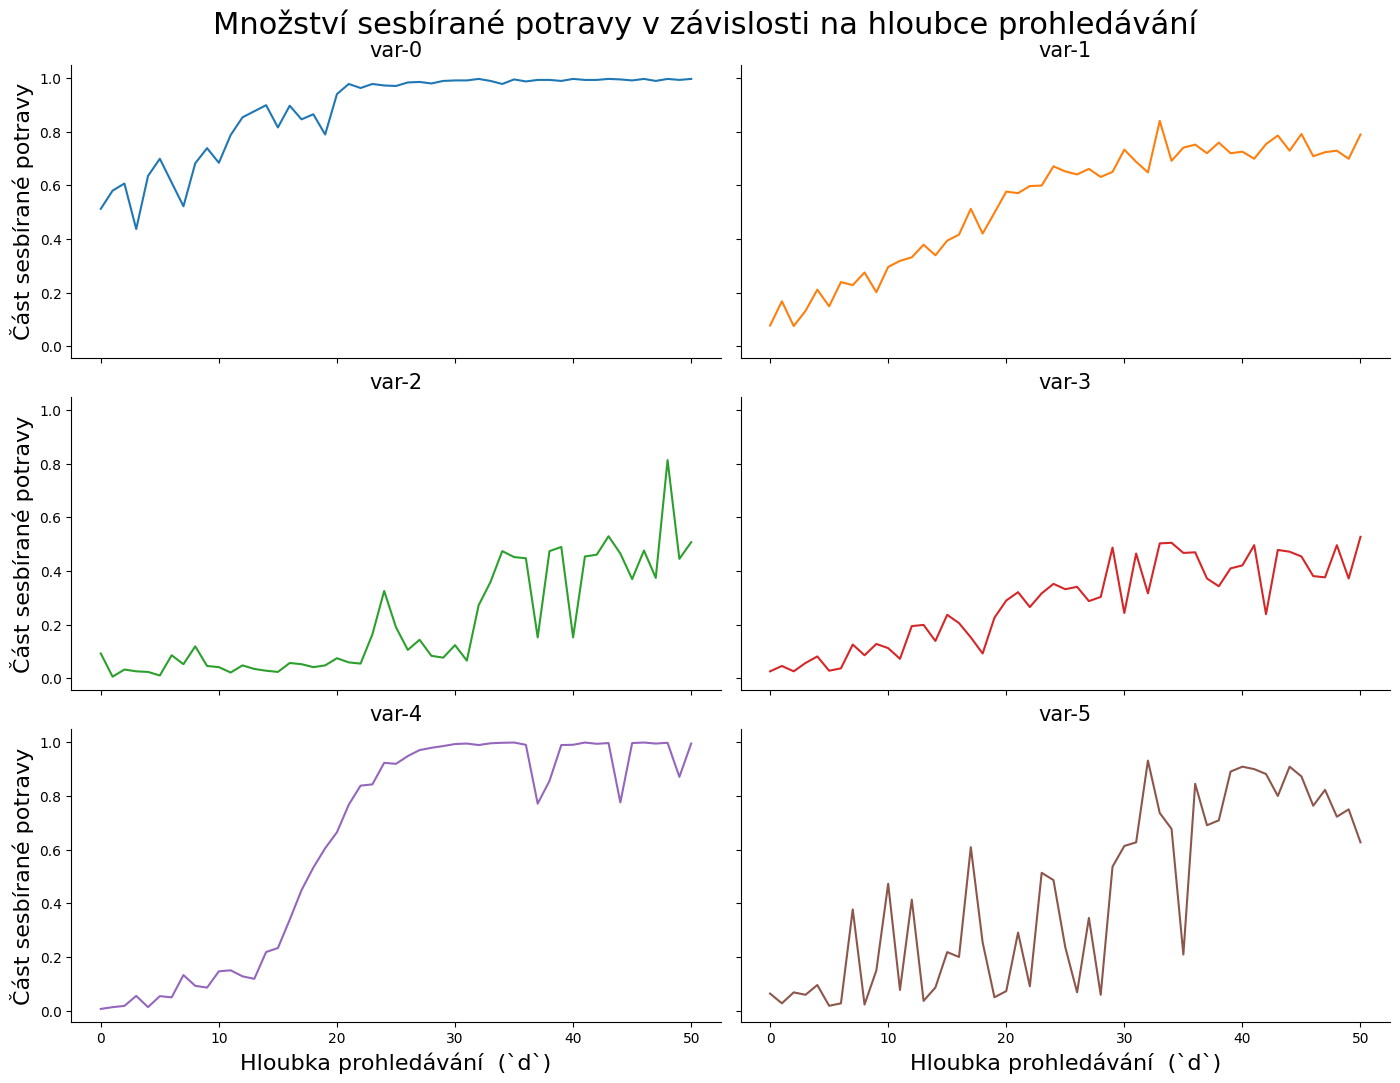

In [33]:
g = sns.relplot(
    data=depth_data, 
    x="variable_size", 
    y="food_percentage",
    aspect=2,
    height=3.5,
    kind="line",
    hue="map_variant",
    col="map_variant",
    col_wrap=2,
    legend=False,
)

g.set_xlabels("Hloubka prohledávání  (`d`)", fontsize=16) 
g.set_ylabels("Část sesbírané potravy", fontsize=16)

# Change the supertitle
g.fig.suptitle("Množství sesbírané potravy v závislosti na hloubce prohledávání", fontsize=22, y=1.02)

# Set each title of the subplots to map_variant value
for ax, title in zip(g.axes.flat, depth_data["map_variant"].unique()):
    ax.set_title(title, fontsize=15)

# plt.savefig('template1/images/search_depth_variants_separated.pdf', bbox_inches='tight')

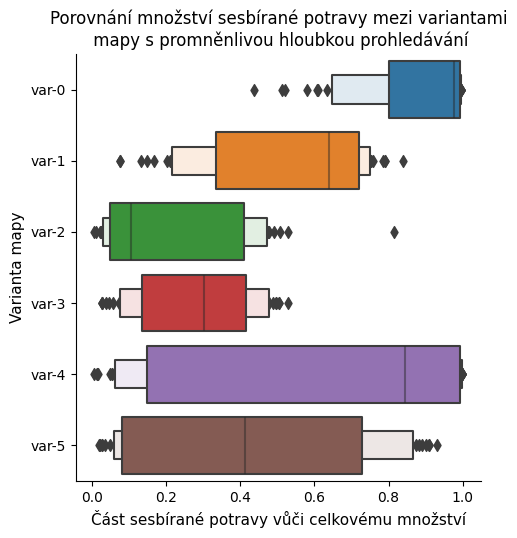

In [46]:
g = sns.catplot(
    data=depth_data,
    y="map_variant",
    x="food_percentage",
    kind="boxen",
).set(title="Porovnání množství sesbírané potravy mezi variantami\n mapy s promněnlivou hloubkou prohledávání")

g.set_axis_labels("Část sesbírané potravy vůči celkovému množství", "Varianta mapy", fontsize=11)

# plt.savefig('template1/images/search_depth_variants_means.pdf', bbox_inches='tight')